# LatticeMaze Demo

This notebook contains a tutorial for [LatticeMaze](../maze_transformer/generation/latticemaze.py), the central maze object in the maze_transformer library.

In [1]:
import numpy as np
from maze_transformer.utils.notebook_utils import configure_notebook
from maze_transformer.generation.generators import LatticeMazeGenerators

%matplotlib inline
configure_notebook(seed=42, dark_mode=True)

device(type='mps')

## Maze representation

The maze can be thought of as a grid of nodes, where an edge between nodes represents a path, and the lack of an edge represents a wall.

The following generates a 4x4 maze using depth-first search.

In [2]:
maze = LatticeMazeGenerators.gen_dfs(np.array([4,4]))
maze

LatticeMaze(lattice_dim=2, connection_list=array([[[ True, False, False,  True],
        [False, False, False,  True],
        [ True, False,  True, False],
        [False, False, False, False]],

       [[False,  True,  True, False],
        [ True,  True,  True, False],
        [ True, False,  True, False],
        [ True,  True,  True, False]]]), generation_meta={'func_name': 'gen_dfs', 'grid_shape': array([4, 4]), 'start_coord': (0, 0)})

### Connection List
In the above cell, we can see the canonical representation of the maze, the *connection list*.  To understand this representation, consider the following connection list for a 2x2 maze.
```
[
    [ # down
        [F T],
        [F F]
    ],
    [ # right
        [T F],
        [T F]
    ]
]
```

The two matrices in the connection list represent the *downward* and *rightward* connections, respectively. It tells us whether a given node has a connection in that direction.
```
down:  N  N     right:  N - N
          |           
       N  N             N - N
```

Note that the bottom row connections going down, and the right-hand column connections going right, will always be False.

We can superimpose the downward and rightward connections to visualize the maze:
```
N - N
    |
N - N
```

---

Using the same method, we can interpret the connection list for the original maze:


In [3]:
maze.connection_list

array([[[ True, False, False,  True],
        [False, False, False,  True],
        [ True, False,  True, False],
        [False, False, False, False]],

       [[False,  True,  True, False],
        [ True,  True,  True, False],
        [ True, False,  True, False],
        [ True,  True,  True, False]]])

```
N   N - N - N
|           |
N - N - N - N
            |
N - N   N - N
|       | 
N - N - N - N
```

### Adjacency list

Another common maze representation structure is an adjacency list, which is literally a list of every pair of adjacent nodes in the maze.

We can view the adjacency list representation of the graph using `LatticeMaze.as_adj_list`

In [4]:
for start, end in maze.as_adj_list():
    print(f"({start[0]}, {start[1]}) <--> ({end[0]}, {end[1]})")

(3, 1) <--> (3, 0)
(2, 0) <--> (2, 1)
(0, 2) <--> (0, 3)
(3, 2) <--> (3, 3)
(3, 0) <--> (2, 0)
(1, 3) <--> (0, 3)
(1, 1) <--> (1, 0)
(2, 3) <--> (1, 3)
(3, 1) <--> (3, 2)
(1, 2) <--> (1, 1)
(0, 1) <--> (0, 2)
(1, 3) <--> (1, 2)
(2, 3) <--> (2, 2)
(0, 0) <--> (1, 0)
(2, 2) <--> (3, 2)


## Plotting a maze

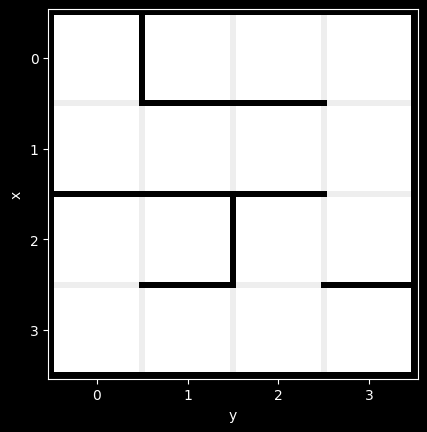

In [26]:
from maze_transformer.evaluation.plot_maze import MazePlot

MazePlot(maze).show()

## Solving the maze algorithmically

`LatticeMaze.find_shortest_path` uses the A* algorithm to find the optimal path through the maze.

In [70]:
true_path = maze.find_shortest_path(
    c_start=(0, 0),
    c_end=(3, 3)
)

print(f"{true_path =}")

path =[(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (2, 2), (3, 2), (3, 3)]


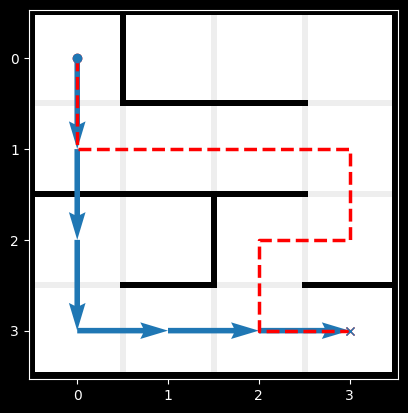

In [75]:
MazePlot(maze).add_true_path(true_path).show()